# Mapeo del plano $s$ en $z$

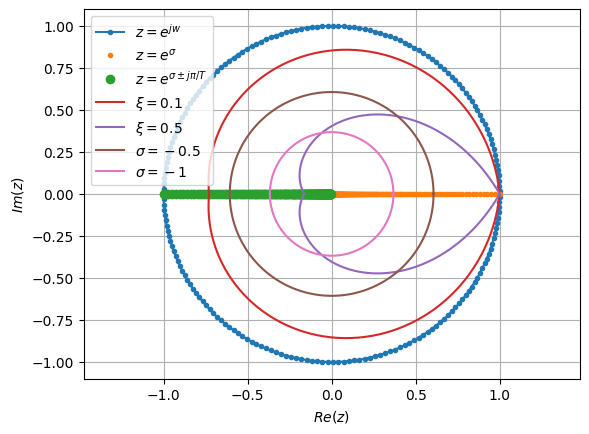

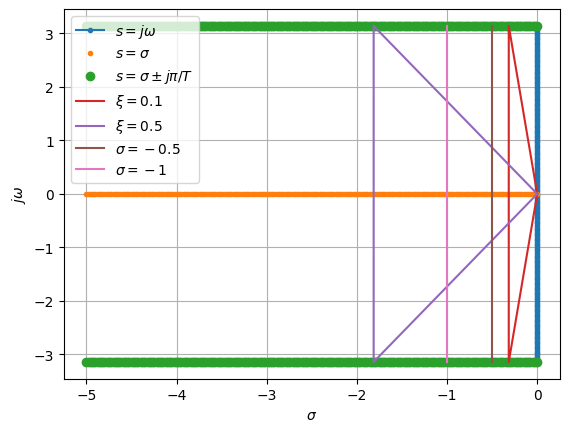

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# eje jw
w = np.linspace(-np.pi, np.pi, 200)
s = 1j * w
z = np.exp(s)
plt.figure(1)
plt.plot(np.real(z), np.imag(z),'.-', label='$z = e^{jw}$')
plt.figure(2)
plt.plot(np.real(s), np.imag(s),'.-', label='$s = j\omega$')

s = np.linspace(0,-5, 200)
z = np.exp(s)
plt.figure(1)
plt.plot(np.real(z), np.imag(z), '.',label='$z = e^{\sigma}$')
plt.figure(2)
plt.plot(np.real(s), np.imag(s), '.', label='$s = \sigma$')

s = np.linspace(0,-5, 200) + 1j * np.pi 
ss = np.hstack((s, np.conj(s[::-1])))
z = np.exp(s)
plt.figure(1)
plt.plot(np.real(z), np.imag(z), 'o', label='$z = e^{\sigma \pm j \pi/T}$')
plt.figure(2)
plt.plot(np.real(ss), np.imag(ss), 'o',label='$s = \sigma \pm j \pi/T$')


# curva de amortiguamiento cte
wd = np.linspace(0, np.pi, 200)
for xi in [0.1, 0.5]:
    wn = np.sqrt(wd**2/(1- xi**2))
    s = -xi * wn + 1j * np.sqrt(wd**2)
    ss = np.hstack((s, np.conj(s[::-1])))
    z = np.exp(s)
    zz = np.hstack((z,np.conj(z[::-1])))
    plt.figure(1)
    plt.plot(np.real(zz), np.imag(zz), label=f'$\\xi={xi}$')
    plt.figure(2)
    plt.plot(np.real(ss), np.imag(ss), label=f'$\\xi={xi}$')

# curva de sigma cte
for sigma in [-0.5, -1]:
    s = sigma + 1j * np.sqrt(wd**2)
    ss = np.hstack((s[::-1], np.conj(s)))
    z = np.exp(s)
    zz = np.hstack((z,np.conj(z[::-1])))
    plt.figure(1)
    plt.plot(np.real(zz), np.imag(zz), label=f'$\sigma={sigma}$')
    plt.figure(2)
    plt.plot(np.real(ss), np.imag(ss), label=f'$\sigma={sigma}$')


plt.figure(1)
plt.xlabel('$Re(z)$')
plt.ylabel('$Im(z)$')
plt.grid()
plt.legend()
plt.axis('equal')

plt.figure(2)
plt.xlabel('$\sigma$')
plt.ylabel('$j\omega$')
plt.grid()
plt.legend()
#plt.axis('equal')
plt.show()

## Evaluación de las distintas aproximaciones del eje $j\omega$

- Euler Forward mapea una línea recta que pasa por $z=1$

- Euler Backward un círculo de radio $\frac{1}{2}$ centrado en $z=\frac{1}{2}$ 

- Tustin un círculo de radio 1 centrado en el origen.

- En las tres aproximaciones no se produce un solapamiento del plano s sobre z para $\omega=(-\infty,\infty)$, a diferencia de ZOH que cada franja entre $\omega=[-\pi/T,\pi/T]$ es mapeada en el círculo unitario.

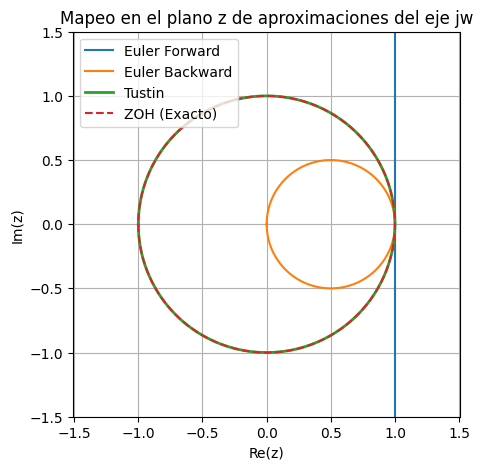

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 1.0  # Período de muestreo
w = np.linspace(-np.pi/T, np.pi/T, 500)
s = 1j * w
w_eback = np.exp(np.linspace(-15, 15, 500))
s_eback = 1j * np.hstack((-w_eback[::-1],w_eback))
#s_eback = 1j * w_eback

# Aproximaciones
z_euler_fwd = 1 + s*T         # Euler Forward: z = 1 + sT
z_euler_bwd = 1 / (1 - s_eback *T)   # Euler Backward: z = 1 / (1 - sT)
z_tustin = (1 + s_eback*T/2) / (1 - s_eback*T/2)  # Tustin: z = (1 + sT/2) / (1 - sT/2)
z_zoh = np.exp(s*T)           # ZOH: z = exp(sT)

# Graficar
plt.figure(figsize=(5,5))
plt.plot(np.real(z_euler_fwd), np.imag(z_euler_fwd), label='Euler Forward')
plt.plot(np.real(z_euler_bwd), np.imag(z_euler_bwd), label='Euler Backward')
plt.plot(np.real(z_tustin), np.imag(z_tustin), label='Tustin',linewidth=2)
plt.plot(np.real(z_zoh), np.imag(z_zoh), label='ZOH (Exacto)', linestyle='--')

# Círculo unitario
theta = np.linspace(0, 2*np.pi, 500)
#plt.plot(np.cos(theta), np.sin(theta), 'k:', label='Círculo unitario')

plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Mapeo en el plano z de aproximaciones del eje jw')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

## Evaluación de los métodos aproximados de discretización

- ¿Cuál método sobreestima y cuál subestima la salida real del sistema?

Sistema continuo G(s):

        1
------------------
s^2 + 0.2 s + 1.01

Polos de G(s): [-0.1+1.j -0.1-1.j]

Discretizando con el método: euler

Sistema discretizado H(z):

-4.441e-16 z + 0.25
-------------------
z^2 - 1.9 z + 1.152

dt = 0.5

Polos de H(z): [0.95+0.5j 0.95-0.5j]
Módulo de los polos de H(z): [1.07354553 1.07354553]

¿H(z) es estable?  NO


/home/pablo/anaconda3/envs/robotica/lib/python3.8/site-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


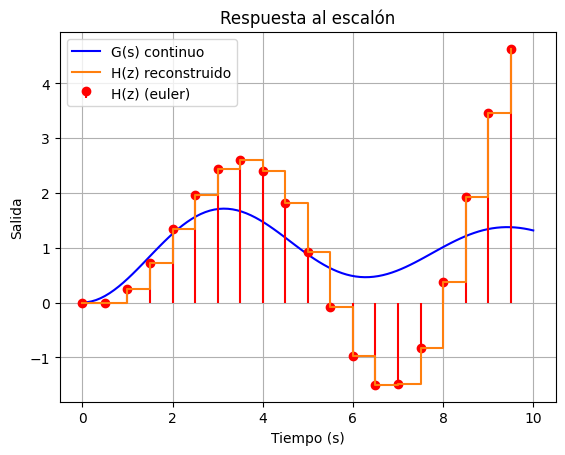


Discretizando con el método: backward_diff

Sistema discretizado H(z):

0.1848 z^2 - 2.22e-16 z + 2.22e-16
----------------------------------
      z^2 - 1.553 z + 0.7394

dt = 0.5

Polos de H(z): [0.77634011+0.36968577j 0.77634011-0.36968577j]
Módulo de los polos de H(z): [0.85986716 0.85986716]

¿H(z) es estable?  Sí


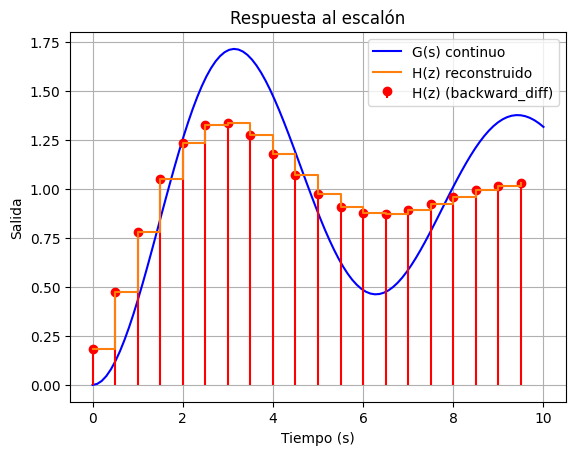


Discretizando con el método: tustin

Sistema discretizado H(z):

0.05615 z^2 + 0.1123 z + 0.05615
--------------------------------
     z^2 - 1.683 z + 0.9102

dt = 0.5

Polos de H(z): [0.84166199+0.44918585j 0.84166199-0.44918585j]
Módulo de los polos de H(z): [0.95402454 0.95402454]

¿H(z) es estable?  Sí


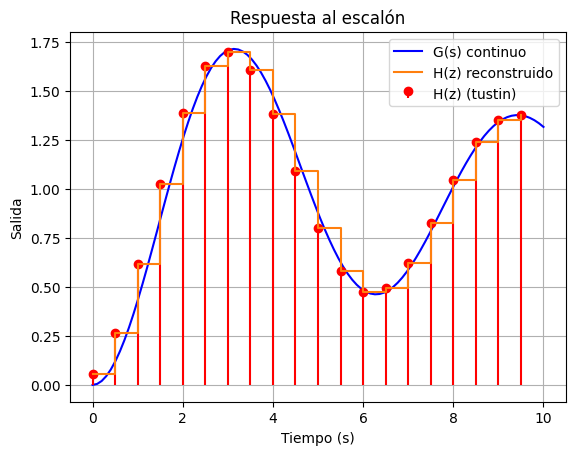


Discretizando con el método: zoh

Sistema discretizado H(z):

  0.1184 z + 0.1145
---------------------
z^2 - 1.67 z + 0.9048

dt = 0.5

Polos de H(z): [0.83478236+0.45604368j 0.83478236-0.45604368j]
Módulo de los polos de H(z): [0.95122942 0.95122942]

¿H(z) es estable?  Sí


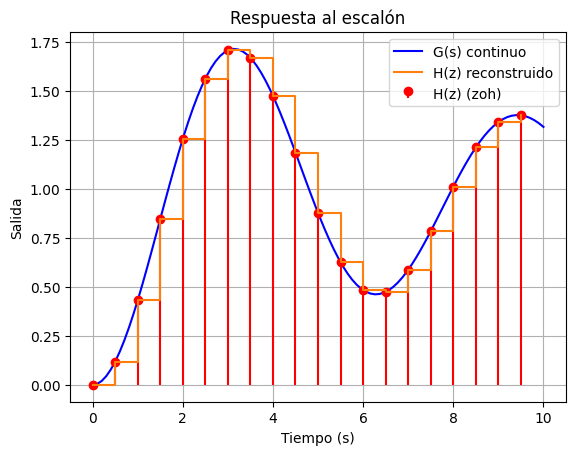

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl

# Muestreo
#T = 0.012  
T = 0.5
t_span = 20*T

# Métodos de discretización
metodos = ['euler', 'backward_diff', 'tustin', 'zoh']

# Sistema continuo
poles = [-0.1 + 1j, -0.1 - 1j]
G = ctl.zpk([],poles,1)
t_cont, y_cont = ctl.step_response(G, T=t_span)
print("Sistema continuo G(s):")
print(G)
print("Polos de G(s):", ctl.pole(G))


for metodo in metodos:
    print(f"\nDiscretizando con el método: {metodo}")    

    # Discretización 
    H = G.sample(T, method=metodo)  
    print("\nSistema discretizado H(z):")
    print(H)
    print("Polos de H(z):", ctl.pole(H))
    print("Módulo de los polos de H(z):", np.abs(ctl.pole(H)))

    # Verificamos estabilidad discreta
    poles_H = ctl.pole(H)
    estable = np.all(np.abs(poles_H) < 1)
    print("\n¿H(z) es estable? ", "Sí" if estable else "NO")

    # Gráfico
    plt.figure()
    plt.plot(t_cont, y_cont, 'b', label='G(s) continuo')

    # Respuesta al escalon
    t_disc, y_disc = ctl.step_response(H, T=np.arange(0, t_span, T))
    plt.stem(t_disc, y_disc, 'r', basefmt=' ', label=f"H(z) ({metodo})")
    plt.step(t_disc, y_disc, '-', where='post', label=f"H(z) reconstruido")

    plt.title('Respuesta al escalón')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Salida')
    plt.legend()
    plt.grid(True)
    plt.show()



Frecuencia natural wn: 1.0

Sistema discretizado H(z):

0.05615 z^2 + 0.1123 z + 0.05615
--------------------------------
     z^2 - 1.683 z + 0.9102

dt = 0.5

Polos de H(z): [0.84166199+0.44918585j 0.84166199-0.44918585j]

Sistema discretizado H(z) con prewarp en wn=1.0:

0.05837 z^2 + 0.1167 z + 0.05837
--------------------------------
     z^2 - 1.673 z + 0.9086

dt = 0.5

Polos de H(z): [0.83636125+0.45722514j 0.83636125-0.45722514j]


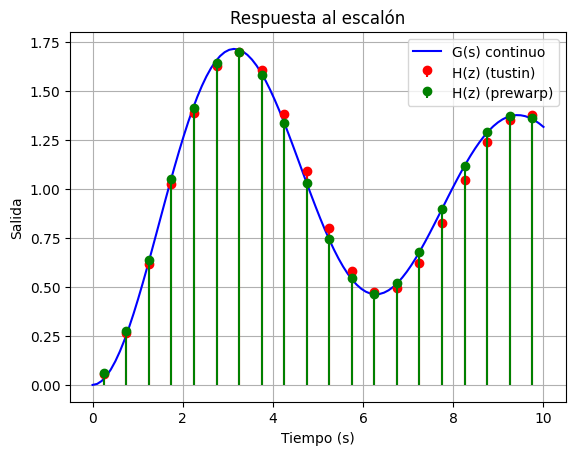

In [ ]:
# Vemos que Tustin es el que mejor aproxima al sistema continuo, ya que mapea el eje $j\omega$ en el círculo unitario. 
# Euler Forward y Backward son aproximaciones que no son muy precisas, pero Tustin es una buena aproximación para sistemas continuos.
# ZOH es una discretización exacta si se excita con escalones, ya que el método asume que hay un ZOH en la entrada de la planta.
# El método de Euler Forward es el que más se aleja del sistema continuo, ya que mapea el eje $j\omega$ en una línea recta que pasa por $z=1$. 

# Sin embargo con Tustin encontramos que se puede mejorar la respuesta obtenida si correjimos los polos usando prewarp 
# Además si graficamos los escalone en lugar de las barras vemos que hay un desfazaje de medio período entre la respuesta continua y la discreta
wn = np.imag(poles[0])
print(f"\nFrecuencia natural wn: {wn}")

H = G.sample(T, method='tustin')  
print("\nSistema discretizado H(z):")
print(H)
print("Polos de H(z):", ctl.pole(H))

Hpw = G.sample(T, method='tustin',prewarp_frequency=wn)  
print(f"\nSistema discretizado H(z) con prewarp en wn={wn}:")
print(Hpw)
print("Polos de H(z):", ctl.pole(Hpw))

# Gráfico
plt.figure()
t_cont, y_cont = ctl.step_response(G, T=t_span)
plt.plot(t_cont, y_cont, 'b', label='G(s) continuo')

# Respuesta al escalon
t_disc, y_disc = ctl.step_response(H, T=np.arange(0, t_span, T))
#plt.step(t_disc, y_disc, '-', where='post', label=f"H(z) (tustin)")
plt.stem(t_disc+T/2, y_disc, 'r', basefmt=' ', label=f"H(z) (tustin)")

t_disc_pw, y_disc_pw = ctl.step_response(Hpw, T=np.arange(0, t_span, T))
plt.stem(t_disc_pw+T/2, y_disc_pw, 'g', basefmt=' ', label=f"H(z) (prewarp)")
#plt.step(t_disc_pw, y_disc_pw, '-', where='post', label=f"H(z) (prewarp)")

plt.title('Respuesta al escalón')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.legend()
plt.grid(True)
plt.show()